In [1]:
#Packages:
import pandas as pd
import numpy as np
import pyreadr as pyr
import sklearn as sk
import matplotlib.pyplot as plt
import scipy as sc
import os
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from sklearn.preprocessing import StandardScaler
from psmpy.plotting import *
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV
import scipy as sc
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import d2_pinball_score, make_scorer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import QuantileRegressor
from sklearn.metrics import confusion_matrix

In [2]:

####Train ################################################
tr_p=pyr.read_r("C:/Users/hp/OneDrive - Universidad de los Andes/Documentos/Docs/Universidad/2022-2/Big Data/Taller 2/Repo/PS2_BD-ML/train_personas.Rds") 
tr_h=pyr.read_r("C:/Users/hp/OneDrive - Universidad de los Andes/Documentos/Docs/Universidad/2022-2/Big Data/Taller 2/Repo/PS2_BD-ML/train_hogares.Rds")
print(tr_p.keys())
print(tr_h.keys())
df_trp=tr_p[None] #train Data frame (individuals). 
df_trh=tr_h[None] #Train Data frame (households). 

odict_keys([None])
odict_keys([None])


In [3]:
df=pd.merge(df_trp, df_trh, on="id") #Train master data frame (merge by unique identificator key). 
df.rename(columns={"Clase_x": "clase"})
df.rename(columns={"Dominio_x": "Dominio"})

,id,Orden,Clase_x,Dominio,Estrato1,P6020,P6040,P6050,P6090,P6100,...,Ingpcug,Li,Lp,Pobre,Indigente,Npobres,Nindigentes,Fex_c_y,Depto_y,Fex_dpto_y
0,9e6553aeb6e744f39a554896,2.0,1,MEDELLIN,2.0,2.0,38.0,2.0,1.0,1.0,...,5.816661e+05,122809.534158,289878.247150,0.0,0.0,0.0,0.0,127.222038,05,146.251790
1,9e6553aeb6e744f39a554896,5.0,1,MEDELLIN,2.0,1.0,3.0,3.0,NaN,NaN,...,5.816661e+05,122809.534158,289878.247150,0.0,0.0,0.0,0.0,127.222038,05,146.251790
2,9e6553aeb6e744f39a554896,1.0,1,MEDELLIN,2.0,1.0,41.0,1.0,1.0,1.0,...,5.816661e+05,122809.534158,289878.247150,0.0,0.0,0.0,0.0,127.222038,05,146.251790
3,9e6553aeb6e744f39a554896,4.0,1,MEDELLIN,2.0,1.0,3.0,3.0,NaN,NaN,...,5.816661e+05,122809.534158,289878.247150,0.0,0.0,0.0,0.0,127.222038,05,146.251790
4,9e6553aeb6e744f39a554896,3.0,1,MEDELLIN,2.0,1.0,11.0,3.0,NaN,NaN,...,5.816661e+05,122809.534158,289878.247150,0.0,0.0,0.0,0.0,127.222038,05,146.251790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542936,56e44db1f6eccf55a29d4a84,2.0,1,BOGOTA,2.0,2.0,24.0,2.0,1.0,1.0,...,4.799466e+05,123416.961118,280522.423188,0.0,0.0,0.0,0.0,386.721150,11,386.721150
542937,904fe39b94b4db42fbd104a3,1.0,1,BOGOTA,3.0,2.0,36.0,1.0,1.0,1.0,...,1.706250e+06,123416.961118,280522.423188,0.0,0.0,0.0,0.0,341.056945,11,341.056945
542938,904fe39b94b4db42fbd104a3,2.0,1,BOGOTA,3.0,1.0,41.0,2.0,1.0,1.0,...,1.706250e+06,123416.961118,280522.423188,0.0,0.0,0.0,0.0,341.056945,11,341.056945
542939,904fe39b94b4db42fbd104a3,3.0,1,BOGOTA,3.0,1.0,8.0,3.0,NaN,NaN,...,1.706250e+06,123416.961118,280522.423188,0.0,0.0,0.0,0.0,341.056945,11,341.056945


In [4]:
#Test ############################################################################################
te_p=pyr.read_r("C:/Users/hp/OneDrive - Universidad de los Andes/Documentos/Docs/Universidad/2022-2/Big Data/Taller 2/Repo/PS2_BD-ML/test_personas.Rds") 
te_h=pyr.read_r("C:/Users/hp/OneDrive - Universidad de los Andes/Documentos/Docs/Universidad/2022-2/Big Data/Taller 2/Repo/PS2_BD-ML/test_hogares.Rds")
print(te_p.keys())
print(te_h.keys())
df_tep=te_p[None] #test Data frame (individuals). 
df_teh=te_h[None] #test Data frame (households). 

odict_keys([None])
odict_keys([None])


In [5]:
df_test=pd.merge(df_tep, df_teh, on="id") #Train master data frame (merge by unique identificator key). 
df_test.rename(columns={"Clase_x": "clase"})
df_test.rename(columns={"Dominio_x": "Dominio"})

,id,Orden,Clase_x,Dominio,P6020,P6040,P6050,P6090,P6100,P6210,...,P5100,P5130,P5140,Nper,Npersug,Li,Lp,Fex_c_y,Depto_y,Fex_dpto_y
0,cefe4dc0e5814074bfa06fb2,1.0,1,MEDELLIN,1.0,33.0,1.0,1.0,1.0,6.0,...,NaN,NaN,250000.0,4.0,4.0,122809.534158,289878.247150,125.720226,05,126.041802
1,cefe4dc0e5814074bfa06fb2,3.0,1,MEDELLIN,2.0,7.0,3.0,NaN,NaN,3.0,...,NaN,NaN,250000.0,4.0,4.0,122809.534158,289878.247150,125.720226,05,126.041802
2,cefe4dc0e5814074bfa06fb2,2.0,1,MEDELLIN,2.0,37.0,2.0,1.0,1.0,6.0,...,NaN,NaN,250000.0,4.0,4.0,122809.534158,289878.247150,125.720226,05,126.041802
3,cefe4dc0e5814074bfa06fb2,4.0,1,MEDELLIN,1.0,5.0,3.0,NaN,NaN,2.0,...,NaN,NaN,250000.0,4.0,4.0,122809.534158,289878.247150,125.720226,05,126.041802
4,b281b20ec5b0c0c76b160041,4.0,1,MEDELLIN,1.0,53.0,5.0,1.0,3.0,1.0,...,NaN,NaN,250000.0,4.0,4.0,122809.534158,289878.247150,115.866093,05,93.080952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219807,693684cc4c15668f6fd4e0fe,1.0,1,RIOHACHA,1.0,74.0,1.0,1.0,2.0,6.0,...,NaN,1000000.0,NaN,5.0,5.0,120863.570032,275548.097647,4.120660,44,5.192896
219808,693684cc4c15668f6fd4e0fe,2.0,1,RIOHACHA,2.0,74.0,2.0,1.0,2.0,6.0,...,NaN,1000000.0,NaN,5.0,5.0,120863.570032,275548.097647,4.120660,44,5.192896
219809,693684cc4c15668f6fd4e0fe,3.0,1,RIOHACHA,2.0,19.0,4.0,1.0,1.0,6.0,...,NaN,1000000.0,NaN,5.0,5.0,120863.570032,275548.097647,4.120660,44,5.192896
219810,693684cc4c15668f6fd4e0fe,4.0,1,RIOHACHA,2.0,18.0,4.0,1.0,1.0,6.0,...,NaN,1000000.0,NaN,5.0,5.0,120863.570032,275548.097647,4.120660,44,5.192896


In [6]:
#Missing values count/share in train.
df.isnull().sum() 
df.isnull().sum()/len(df) 

id             0.0
Orden          0.0
Clase_x        0.0
Dominio_x      0.0
Estrato1       0.0
              ... 
Npobres        0.0
Nindigentes    0.0
Fex_c_y        0.0
Depto_y        0.0
Fex_dpto_y     0.0
Length: 157, dtype: float64

In [7]:
df_test.columns

Index(['id', 'Orden', 'Clase_x', 'Dominio_x', 'P6020', 'P6040', 'P6050',
       'P6090', 'P6100', 'P6210', 'P6210s1', 'P6240', 'Oficio', 'P6426',
       'P6430', 'P6510', 'P6545', 'P6580', 'P6585s1', 'P6585s2', 'P6585s3',
       'P6585s4', 'P6590', 'P6600', 'P6610', 'P6620', 'P6630s1', 'P6630s2',
       'P6630s3', 'P6630s4', 'P6630s6', 'P6800', 'P6870', 'P6920', 'P7040',
       'P7045', 'P7050', 'P7090', 'P7110', 'P7120', 'P7150', 'P7160', 'P7310',
       'P7350', 'P7422', 'P7472', 'P7495', 'P7500s2', 'P7500s3', 'P7505',
       'P7510s1', 'P7510s2', 'P7510s3', 'P7510s5', 'P7510s6', 'P7510s7', 'Pet',
       'Oc', 'Des', 'Ina', 'Fex_c_x', 'Depto_x', 'Fex_dpto_x', 'Clase_y',
       'Dominio_y', 'P5000', 'P5010', 'P5090', 'P5100', 'P5130', 'P5140',
       'Nper', 'Npersug', 'Li', 'Lp', 'Fex_c_y', 'Depto_y', 'Fex_dpto_y'],
      dtype='object')

In [8]:
df_test.columns

Index(['id', 'Orden', 'Clase_x', 'Dominio_x', 'P6020', 'P6040', 'P6050',
       'P6090', 'P6100', 'P6210', 'P6210s1', 'P6240', 'Oficio', 'P6426',
       'P6430', 'P6510', 'P6545', 'P6580', 'P6585s1', 'P6585s2', 'P6585s3',
       'P6585s4', 'P6590', 'P6600', 'P6610', 'P6620', 'P6630s1', 'P6630s2',
       'P6630s3', 'P6630s4', 'P6630s6', 'P6800', 'P6870', 'P6920', 'P7040',
       'P7045', 'P7050', 'P7090', 'P7110', 'P7120', 'P7150', 'P7160', 'P7310',
       'P7350', 'P7422', 'P7472', 'P7495', 'P7500s2', 'P7500s3', 'P7505',
       'P7510s1', 'P7510s2', 'P7510s3', 'P7510s5', 'P7510s6', 'P7510s7', 'Pet',
       'Oc', 'Des', 'Ina', 'Fex_c_x', 'Depto_x', 'Fex_dpto_x', 'Clase_y',
       'Dominio_y', 'P5000', 'P5010', 'P5090', 'P5100', 'P5130', 'P5140',
       'Nper', 'Npersug', 'Li', 'Lp', 'Fex_c_y', 'Depto_y', 'Fex_dpto_y'],
      dtype='object')

In [9]:
c0=[i for i in df_test.columns]

In [10]:
######################################Train #############################################################################

#Convert categorical variables to dummy variables:
estrato1_d=pd.get_dummies(df["Estrato1"], prefix="estrato") 
maxeduc_d=pd.get_dummies(df["P6210"], prefix="educ") 
dominio_d=pd.get_dummies(df["Dominio_x"], prefix="dominio")
departamento_d=pd.get_dummies(df["Depto_x"], prefix="depto")
salud_d=pd.get_dummies(df["P6100"], prefix="salud")
trabajo_d=pd.get_dummies(df["P6430"], prefix="trabajo")
actividad_d=pd.get_dummies(df["P6240"], prefix="act")
numper_d=pd.get_dummies(df["P6870"], prefix="numper")
ocseg_d=pd.get_dummies(df["P7050"], prefix="ocseg")
trabdeso_d=pd.get_dummies(df["P7350"], prefix="trabdeso")
tipovivienda_d=pd.get_dummies(df["P5090"], prefix="tipoviv")
oficio_d=pd.get_dummies(df["Oficio"], prefix="oficio")


#Merge dummy's variables data frame with master data frame:
df=pd.merge(df, estrato1_d, left_index=True, right_index=True)
df=pd.merge(df, maxeduc_d, left_index=True, right_index=True)
df=pd.merge(df, dominio_d, left_index=True, right_index=True)
df=pd.merge(df, departamento_d, left_index=True, right_index=True)
df=pd.merge(df, trabajo_d, left_index=True, right_index=True)
df=pd.merge(df, salud_d, left_index=True, right_index=True)
df=pd.merge(df, actividad_d, left_index=True, right_index=True)
df=pd.merge(df, numper_d, left_index=True, right_index=True)
df=pd.merge(df, ocseg_d, left_index=True, right_index=True)
df=pd.merge(df, trabdeso_d, left_index=True, right_index=True)
df=pd.merge(df, tipovivienda_d, left_index=True, right_index=True)
df=pd.merge(df, oficio_d, left_index=True, right_index=True)




In [11]:
##################Test ###############################################################################################

maxeduc_d=pd.get_dummies(df_test["P6210"], prefix="educ") 
dominio_d=pd.get_dummies(df_test["Dominio_x"], prefix="dominio")
departamento_d=pd.get_dummies(df_test["Depto_x"], prefix="depto")
salud_d=pd.get_dummies(df_test["P6100"], prefix="salud")
trabajo_d=pd.get_dummies(df_test["P6430"], prefix="trabajo")
actividad_d=pd.get_dummies(df_test["P6240"], prefix="act")
numper_d=pd.get_dummies(df_test["P6870"], prefix="numper")
ocseg_d=pd.get_dummies(df_test["P7050"], prefix="ocseg")
trabdeso_d=pd.get_dummies(df_test["P7350"], prefix="trabdeso")
tipovivienda_d=pd.get_dummies(df_test["P5090"], prefix="tipoviv")
oficio_d=pd.get_dummies(df_test["Oficio"], prefix="oficio")

#Merge dummy's variables data frame with master data frame:
df_test=pd.merge(df_test, maxeduc_d, left_index=True, right_index=True)
df_test=pd.merge(df_test, dominio_d, left_index=True, right_index=True)
df_test=pd.merge(df_test, departamento_d, left_index=True, right_index=True)
df_test=pd.merge(df_test, salud_d, left_index=True, right_index=True)
df_test=pd.merge(df_test, trabajo_d, left_index=True, right_index=True)
df_test=pd.merge(df_test, actividad_d, left_index=True, right_index=True)
df_test=pd.merge(df_test, numper_d, left_index=True, right_index=True)
df_test=pd.merge(df_test, ocseg_d, left_index=True, right_index=True)
df_test=pd.merge(df_test, trabdeso_d, left_index=True, right_index=True)
df_test=pd.merge(df_test, tipovivienda_d, left_index=True, right_index=True)
df_test=pd.merge(df_test, oficio_d, left_index=True, right_index=True)


In [12]:

#Recode variables of train ###########
var=(["P6020", "P6090", "P6510", "P6545", "P6580", "P6585s1", "P6585s2", "P6585s3", "P6585s4", "P6590", "P6600", "P6610", "P6620"
 ,"P6630s1", "P6630s2", "P6630s3", "P6630s4" ,"P6630s6" , "P6920","P7040","P7090","P7110","P7120","P7150", "P7160", "P7310",
 "P7422", "P7472", "P7495", "P7500s2", "P7500s3","P7505", "P7510s1", "P7510s2","P7510s3", "P7510s5", "P7510s6", "P7510s7"])

ceros=["Oc", "Des", "Ina"]


for i in var:
    df[i]=np.where(df[i]==9, np.nan, df[i])
    df[i]=np.where(df[i]==1, 1, 0*df[i])

##Replace Na=0 in Ocupados, Desocupados and Inactivos
for i in ceros:
    df[i]=np.where(df[i]==1, 1, 0)

#Recode variables of test ###########
for i in var:
    df_test[i]=np.where(df_test[i]==9, np.nan, df_test[i])
    df_test[i]=np.where(df_test[i]==1, 1, 0*df_test[i])

for i in ceros:
    df_test[i]=np.where(df_test[i]==1, 1, 0)



In [13]:
#Generate descriptive statistics of train dataset
ds=(df[["Ingtotugarr", "Ingtot", "P6040", "Nper", "Pobre", "P6020", "estrato_1.0", "estrato_2.0", "estrato_3.0", 
"estrato_4.0", "estrato_5.0", "estrato_6.0", "educ_1.0", "educ_2.0", "educ_3.0", "educ_4.0", "educ_5.0", "educ_6.0", "P6585s3", "Oc"]].describe(include="all"))
ds=ds.T
ds=ds[["count", "mean", "std", "min", "50%", "max"]]
ds=ds.round(2)
print(ds.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &     count &        mean &         std &  min &         50\% &          max \\
\midrule
Ingtotugarr &  542941.0 &  2494456.17 &  2640107.05 &  0.0 &  1796407.33 &  88833333.33 \\
Ingtot      &  447512.0 &   775591.56 &  1380447.03 &  0.0 &   430000.00 &  85833333.33 \\
P6040       &  542941.0 &       33.55 &       21.64 &  0.0 &       31.00 &       110.00 \\
Nper        &  542941.0 &        4.25 &        2.07 &  1.0 &        4.00 &        22.00 \\
Pobre       &  542941.0 &        0.25 &        0.43 &  0.0 &        0.00 &         1.00 \\
P6020       &  542941.0 &        0.47 &        0.50 &  0.0 &        0.00 &         1.00 \\
estrato\_1.0 &  542941.0 &        0.22 &        0.41 &  0.0 &        0.00 &         1.00 \\
estrato\_2.0 &  542941.0 &        0.26 &        0.44 &  0.0 &        0.00 &         1.00 \\
estrato\_3.0 &  542941.0 &        0.22 &        0.42 &  0.0 &        0.00 &         1.00 \\
estrato\_4.0 &  542941.0 &        0.11 &        0.32

C:\Users\hp\AppData\Local\Temp\ipykernel_412\846797401.py:7: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(ds.to_latex())


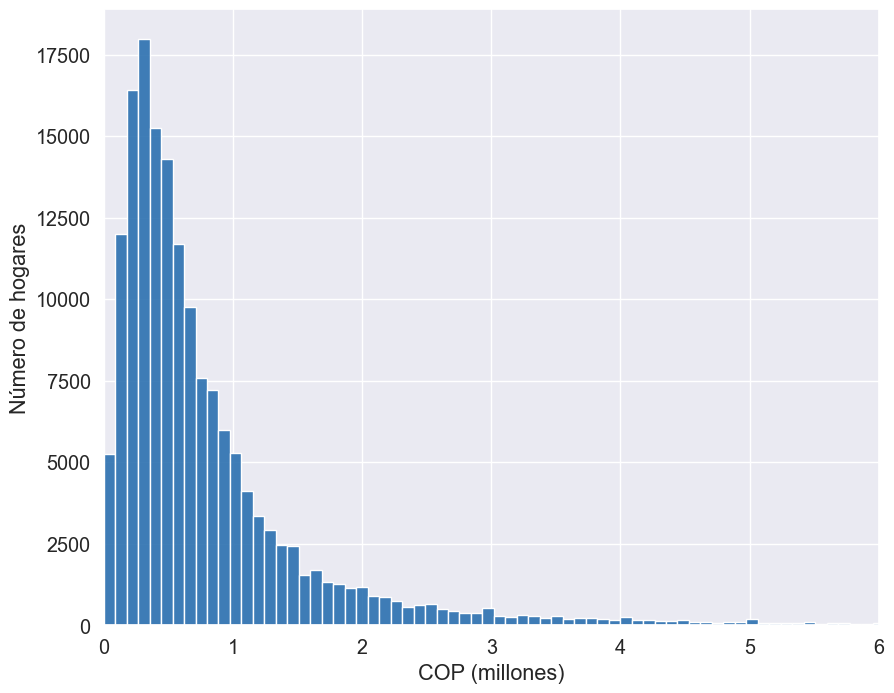

In [14]:
#Histogram of ingtotug
#Histogram of household per_capita income:
df_trh["Ingtotugarr_mM"]=df_trh["Ingtotugarr"]/df_trh["Nper"]/1000000
plt.hist(df_trh["Ingtotugarr_mM"], bins=1000, color = (0.17, 0.44, 0.69, 0.9))
plt.xlim(0,6)
#plt.ylim(0,10000)
plt.xticks([i for i in range(7)])
plt.ylabel("Número de hogares")
plt.xlabel("COP (millones)")
plt.savefig("histy_ipch.jpg", bbox_inches="tight")
plt.show()

In [15]:
df_test[c0]

,id,Orden,Clase_x,Dominio_x,P6020,P6040,P6050,P6090,P6100,P6210,...,P5100,P5130,P5140,Nper,Npersug,Li,Lp,Fex_c_y,Depto_y,Fex_dpto_y
0,cefe4dc0e5814074bfa06fb2,1.0,1,MEDELLIN,1.0,33.0,1.0,1.0,1.0,6.0,...,NaN,NaN,250000.0,4.0,4.0,122809.534158,289878.247150,125.720226,05,126.041802
1,cefe4dc0e5814074bfa06fb2,3.0,1,MEDELLIN,0.0,7.0,3.0,NaN,NaN,3.0,...,NaN,NaN,250000.0,4.0,4.0,122809.534158,289878.247150,125.720226,05,126.041802
2,cefe4dc0e5814074bfa06fb2,2.0,1,MEDELLIN,0.0,37.0,2.0,1.0,1.0,6.0,...,NaN,NaN,250000.0,4.0,4.0,122809.534158,289878.247150,125.720226,05,126.041802
3,cefe4dc0e5814074bfa06fb2,4.0,1,MEDELLIN,1.0,5.0,3.0,NaN,NaN,2.0,...,NaN,NaN,250000.0,4.0,4.0,122809.534158,289878.247150,125.720226,05,126.041802
4,b281b20ec5b0c0c76b160041,4.0,1,MEDELLIN,1.0,53.0,5.0,1.0,3.0,1.0,...,NaN,NaN,250000.0,4.0,4.0,122809.534158,289878.247150,115.866093,05,93.080952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219807,693684cc4c15668f6fd4e0fe,1.0,1,RIOHACHA,1.0,74.0,1.0,1.0,2.0,6.0,...,NaN,1000000.0,NaN,5.0,5.0,120863.570032,275548.097647,4.120660,44,5.192896
219808,693684cc4c15668f6fd4e0fe,2.0,1,RIOHACHA,0.0,74.0,2.0,1.0,2.0,6.0,...,NaN,1000000.0,NaN,5.0,5.0,120863.570032,275548.097647,4.120660,44,5.192896
219809,693684cc4c15668f6fd4e0fe,3.0,1,RIOHACHA,0.0,19.0,4.0,1.0,1.0,6.0,...,NaN,1000000.0,NaN,5.0,5.0,120863.570032,275548.097647,4.120660,44,5.192896
219810,693684cc4c15668f6fd4e0fe,4.0,1,RIOHACHA,0.0,18.0,4.0,1.0,1.0,6.0,...,NaN,1000000.0,NaN,5.0,5.0,120863.570032,275548.097647,4.120660,44,5.192896


In [16]:
###Split train and test using training database. 
#Train sub test database using PSM to reproduce test 

elim=(["id", "Orden", "Fex_c_y", "Clase_y", "Dominio_y", "Depto_y", "Dominio_x", "Depto_x",  "Fex_dpto_y", "Fex_dpto_x", "Fex_c_x" , "Depto_x", 
"P6050" , "P6210s1", "P6210s1" , "educ_1.0" , "dominio_ARMENIA" , "depto_05", "salud_1.0", "salud_9.0" , "trabajo_9.0", "act_1.0", 
"numper_1.0", "ocseg_1.0", "trabdeso_1.0", "tipoviv_1.0", "oficio_1.0", "P6100", "P6210", "P6240" , "Oficio", "P6430", "P6870", "P7050", 
"P7350" , "P5090"])

df["test"]=0
df_test["test"]=1
c=[i for i in df_test.columns if i not in elim]

####Dealing with nans
imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
x1=df_test[c]
x1=imp_mean.fit_transform(x1)

x2=df[c]
x2=imp_mean.fit_transform(x2)

imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

x1c=df_test[c0]
x1c=imp_mean.fit_transform(x1c)


x2c=df[c0]
x2c=imp_mean.fit_transform(x2c)



c:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\fixes.py:44: RuntimeWarning: invalid value encountered in not_equal
  return X != X
c:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\fixes.py:44: RuntimeWarning: invalid value encountered in not_equal
  return X != X
c:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\fixes.py:44: RuntimeWarning: invalid value encountered in not_equal
  return X != X
c:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\fixes.py:44: RuntimeWarning: invalid value encountered in not_equal
  return X != X
c:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\fixes.py:44: RuntimeWarning: invalid value encountered in not_equal
  return X != X
c:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\fixes.py:44: RuntimeWarning: invalid value encountered in not_equal
  return X != X
c:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\fixes.py:44: RuntimeWarning: invalid value encountered in not_equal
  return X != X
c:\Users\hp\anaconda3\lib\site-pac

In [17]:
x111c=pd.DataFrame(x2c, columns=c0)
x111c=x111c[x111c["P6050"]==1]

In [18]:
x111c

,id,Orden,Clase_x,Dominio_x,P6020,P6040,P6050,P6090,P6100,P6210,...,P5100,P5130,P5140,Nper,Npersug,Li,Lp,Fex_c_y,Depto_y,Fex_dpto_y
2,9e6553aeb6e744f39a554896,1.0,1,MEDELLIN,1.0,41.0,1.0,1.0,1.0,5.0,...,98.0,400000.0,400000.0,5.0,5.0,122809.534158,289878.24715,127.222038,05,146.25179
7,0df8a508e83a05f2908f3eab,1.0,1,MEDELLIN,0.0,38.0,1.0,0.0,1.0,6.0,...,98.0,700000.0,400000.0,3.0,3.0,122809.534158,289878.24715,100.123276,05,89.637086
8,c2a5dfaf9fdba154a9e866a7,1.0,1,MEDELLIN,1.0,43.0,1.0,1.0,3.0,3.0,...,98.0,450000.0,400000.0,1.0,1.0,122809.534158,289878.24715,108.829812,05,95.584376
11,31944bdf7ac6f635696b2f80,1.0,1,MEDELLIN,1.0,48.0,1.0,1.0,1.0,5.0,...,98.0,400000.0,400000.0,3.0,3.0,122809.534158,289878.24715,91.694911,05,81.112706
15,2aa8971ddf2e9749f894907d,1.0,1,MEDELLIN,1.0,51.0,1.0,1.0,1.0,6.0,...,98.0,750000.0,400000.0,4.0,4.0,122809.534158,289878.24715,110.792831,05,92.756218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542912,4e8d8fb02746a6c25abfcae8,1.0,1,CALI,0.0,64.0,1.0,1.0,3.0,4.0,...,98.0,300000.0,460000.0,3.0,3.0,127336.653858,280234.432107,73.088259,76,77.806334
542918,b382ab52babac146ae74e034,1.0,1,BOGOTA,1.0,39.0,1.0,0.0,1.0,6.0,...,98.0,300000.0,650000.0,8.0,8.0,123416.961118,280522.423188,413.891448,11,413.891448
542923,d5eec4bd989b58f4c2489292,1.0,1,BOGOTA,1.0,79.0,1.0,1.0,1.0,4.0,...,98.0,2000000.0,400000.0,10.0,10.0,123416.961118,280522.423188,233.379248,11,233.379248
542935,56e44db1f6eccf55a29d4a84,1.0,1,BOGOTA,1.0,27.0,1.0,1.0,1.0,5.0,...,98.0,300000.0,400000.0,4.0,4.0,123416.961118,280522.423188,386.72115,11,386.72115


In [19]:
#Create a X matrix of covariates
x11=pd.DataFrame(x1, columns=c)
x22=pd.DataFrame(x2, columns=c)
X=x22.append(x11, ignore_index=True)

#Create matrix Y
Y=X["test"]
Y=Y.astype('int')

C:\Users\hp\AppData\Local\Temp\ipykernel_412\363893823.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X=x22.append(x11, ignore_index=True)


In [20]:
## Generate PSM of test
lr = LogisticRegression(random_state=911, class_weight="balanced")
result=lr.fit(X,Y)
PSM=result.predict_proba(X)

In [21]:
PSM=pd.DataFrame(PSM, columns=["no", "si"])
PSM
X=pd.merge(X,PSM, left_index=True, right_index=True) 
X

,Clase_x,P6020,P6040,P6090,P6426,P6510,P6545,P6580,P6585s1,P6585s2,...,oficio_93.0,oficio_94.0,oficio_95.0,oficio_96.0,oficio_97.0,oficio_98.0,oficio_99.0,test,no,si
0,1,0.0,38.0,1.0,4.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0.519885,0.480115
1,1,1.0,3.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.519885,0.480115
2,1,1.0,41.0,1.0,240.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0.519883,0.480117
3,1,1.0,3.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.519885,0.480115
4,1,1.0,11.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.519885,0.480115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762748,1,1.0,74.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0.443328,0.556672
762749,1,0.0,74.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0.443328,0.556672
762750,1,0.0,19.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0.443328,0.556672
762751,1,0.0,18.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0.443328,0.556672


In [22]:
grouped = X.groupby(X.test)
X_train = grouped.get_group(0)
X_test = grouped.get_group(1)

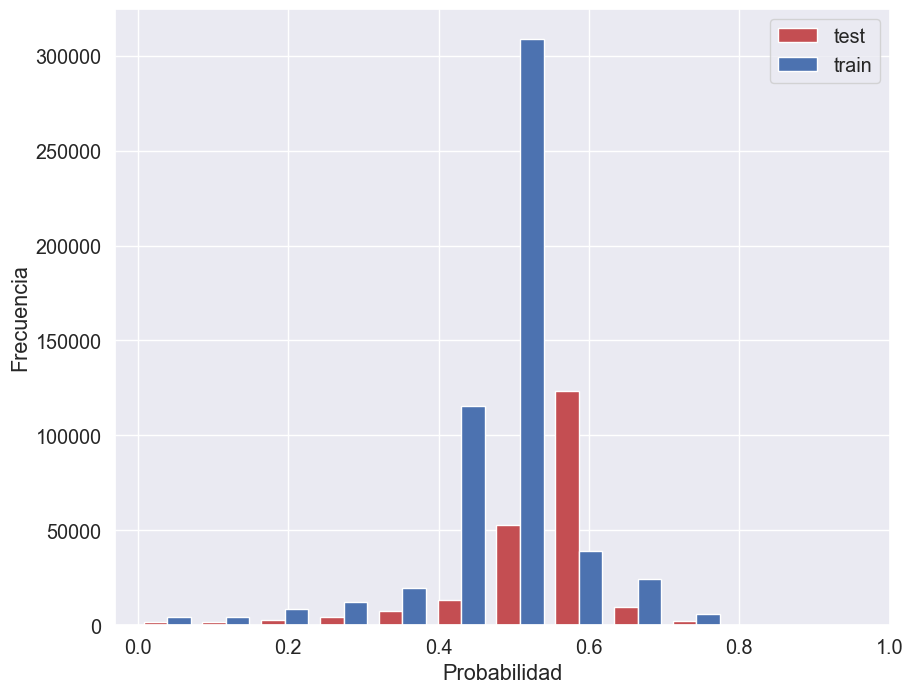

In [23]:
plt.hist([X_test.si,X_train.si], bins=10, label=["test", "train"], color=["r", "b"] )
plt.legend(loc="upper right")
plt.xticks([0,0.2,0.4,0.6,0.8,1])
plt.ylabel("Frecuencia")
plt.xlabel("Probabilidad")
plt.savefig("histy_psm.jpg", bbox_inches="tight")
plt.show()



In [24]:

x11c=pd.DataFrame(x1c, columns=c0)
x22c=pd.DataFrame(x2c, columns=c0)
x11c["test"]=1
x22c["test"]=0

Xc=x22c.append(x11c, ignore_index=True)

Xc=pd.merge(Xc, X.si, left_index=True, right_index=True)

grouped = Xc.groupby(Xc.test)
X_trainc = grouped.get_group(0)
X_testc = grouped.get_group(1)


C:\Users\hp\AppData\Local\Temp\ipykernel_412\1724124281.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Xc=x22c.append(x11c, ignore_index=True)


In [25]:
###Dummy 1 if propensity score >0.5
X_trainc["PSM"]=np.where(X_trainc["si"]>=0.5, 1,0)

###Keep only jefe hogar
X_traincol = X_trainc[X_trainc["P6050"]==1]

X_testcol = X_testc[X_testc["P6050"]==1]

########Split X_trainc in X_train2 and X_ttest

psm=pd.DataFrame(X_trainc["PSM"].groupby(X_trainc["id"]).mean()).reset_index()
psm=psm.rename(columns={"PSM": "PSMc"})
X_traincol=pd.merge(X_traincol,psm)


C:\Users\hp\AppData\Local\Temp\ipykernel_412\2980242563.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_trainc["PSM"]=np.where(X_trainc["si"]>=0.5, 1,0)


In [26]:
############################## Collapse data base at household level #############################
####Keep only parentesco=jefe hogar

###########collapse train ##################

psm=X_trainc["P6040"].groupby(X_trainc["id"]).apply(np.mean).reset_index()
psm=psm.rename(columns={"P6040": "promedad"})
X_traincol=pd.merge(X_traincol,psm)

listg=["P6800", "P7045","Pet", "Oc"]

for i in listg:
    psm=pd.DataFrame(X_trainc[i].groupby(X_trainc["id"]).sum()).reset_index()
    psm=psm.rename(columns={i: i+"col"})
    X_traincol=pd.merge(X_traincol,psm)


#############collapse test####################################3
####Keep only parentesco=jefe hogar

###########collapse test ##################
psm=X_testc["P6040"].groupby(X_testc["id"]).apply(np.mean).reset_index()
psm=psm.rename(columns={"P6040": "promedad"})
X_testcol=pd.merge(X_testcol,psm)

listg=["P6800", "P7045","Pet", "Oc"]

for i in listg:
    psm=pd.DataFrame(X_testc[i].groupby(X_testc["id"]).sum()).reset_index()
    psm=psm.rename(columns={i: i+"col"})
    X_testcol=pd.merge(X_testcol,psm)





In [27]:

########Merge dependent variables in X########
df_ycol=df[df["P6050"]==1]
X_traincol=pd.merge(X_traincol,df_ycol[["Ingtotugarr", "Pobre", "id"]]) 

In [28]:
X_traincol.columns

Index(['id', 'Orden', 'Clase_x', 'Dominio_x', 'P6020', 'P6040', 'P6050',
       'P6090', 'P6100', 'P6210', 'P6210s1', 'P6240', 'Oficio', 'P6426',
       'P6430', 'P6510', 'P6545', 'P6580', 'P6585s1', 'P6585s2', 'P6585s3',
       'P6585s4', 'P6590', 'P6600', 'P6610', 'P6620', 'P6630s1', 'P6630s2',
       'P6630s3', 'P6630s4', 'P6630s6', 'P6800', 'P6870', 'P6920', 'P7040',
       'P7045', 'P7050', 'P7090', 'P7110', 'P7120', 'P7150', 'P7160', 'P7310',
       'P7350', 'P7422', 'P7472', 'P7495', 'P7500s2', 'P7500s3', 'P7505',
       'P7510s1', 'P7510s2', 'P7510s3', 'P7510s5', 'P7510s6', 'P7510s7', 'Pet',
       'Oc', 'Des', 'Ina', 'Fex_c_x', 'Depto_x', 'Fex_dpto_x', 'Clase_y',
       'Dominio_y', 'P5000', 'P5010', 'P5090', 'P5100', 'P5130', 'P5140',
       'Nper', 'Npersug', 'Li', 'Lp', 'Fex_c_y', 'Depto_y', 'Fex_dpto_y',
       'test', 'si', 'PSM', 'PSMc', 'promedad', 'P6800col', 'P7045col',
       'Petcol', 'Occol', 'Ingtotugarr', 'Pobre'],
      dtype='object')

In [29]:
####Recode variables #################################
##################Train ######################################################
X_traincol["saluds"]=np.where(X_traincol["P6100"]==3, 1,0)
X_traincol["univ"]=np.where(X_traincol["P6210"]==6, 1,0)
X_traincol["bajeduc"]=np.where( (X_traincol["P6210"]==1) | (X_traincol["P6210"]==2) | (X_traincol["P6210"]==3) , 1,0)
X_traincol["traba"]=np.where(X_traincol["P6240"]==1, 1,0)
X_traincol["busctrab"]=np.where(X_traincol["P6240"]==2, 1,0)
X_traincol["microemp"]=np.where( (X_traincol["P6870"]==8) | (X_traincol["P6870"]==9) ,0,1)

###Hacinamiento
X_traincol["personaxhab"]=X_traincol["Nper"]/X_traincol["P5010"]
X_traincol["hacinamiento"]=np.where(X_traincol["personaxhab"]>3, 1,0)

X_traincol["vivpropia"]=np.where( (X_traincol["P5090"]==1) | (X_traincol["P5090"]==1) ,1,0)


###################################Test #################################
X_testcol["saluds"]=np.where(X_testcol["P6100"]==3, 1,0)
X_testcol["univ"]=np.where(X_testcol["P6210"]==6, 1,0)
X_testcol["bajeduc"]=np.where( (X_testcol["P6210"]==1) | (X_testcol["P6210"]==2) | (X_testcol["P6210"]==3) , 1,0)
X_testcol["traba"]=np.where(X_testcol["P6240"]==1, 1,0)
X_testcol["busctrab"]=np.where(X_testcol["P6240"]==2, 1,0)
X_testcol["microemp"]=np.where( (X_testcol["P6870"]==8) | (X_testcol["P6870"]==9) ,0,1)

###Hacinamiento
X_testcol["personaxhab"]=X_testcol["Nper"]/X_testcol["P5010"]
X_testcol["hacinamiento"]=np.where(X_testcol["personaxhab"]>3, 1,0)

X_testcol["vivpropia"]=np.where( (X_testcol["P5090"]==1) | (X_testcol["P5090"]==1) ,1,0)


In [30]:
X_traincol["arriendo"]=X_traincol["P5130"]+X_traincol["P5140"]

X_traincol["horastotal"]=X_traincol["P6800"]+X_traincol["P7045"]


In [31]:
#####Get dummies dominio
dominio_d1=pd.get_dummies(X_traincol["Dominio_x"], prefix="dominio")
X_traincol=pd.merge(X_traincol, dominio_d, left_index=True, right_index=True)

dominio_d2=pd.get_dummies(X_testcol["Dominio_x"], prefix="dominio")
X_testcol=pd.merge(X_testcol, dominio_d, left_index=True, right_index=True)


In [32]:
###Select a subset of variables 

variables1=([ 'Clase_x', 'P6020', 'P6040', 'P6090', 'P6426', 'P6545', 'P6590', 'P6610', 'P6920',  'P7422', 'P7495', 'P7505', 'P5100' ,
'promedad', 'P6800col', 'P7045col', 'Petcol', 'Occol',
       'saluds', 'univ', 'bajeduc', 'traba', 'busctrab', 'microemp',
       'personaxhab', 'hacinamiento', 'vivpropia', 'PSMc',"Ingtotugarr", "Pobre", "Lp", "id", "Li" , "Npersug", "arriendo", "horastotal"])


variables2=([ 'Clase_x', 'P6020', 'P6040', 'P6090', 'P6426', 'P6545', 'P6590', 'P6610', 'P6920',  'P7422', 'P7495', 'P7505', 'P5100' ,
'promedad', 'P6800col', 'P7045col', 'Petcol', 'Occol',
       'saluds', 'univ', 'bajeduc', 'traba', 'busctrab', 'microemp',
       'personaxhab', 'hacinamiento', 'vivpropia', 'id', "Npersug"])
       

variables1=variables1+list(dominio_d1.columns[1:])
variables1=[i for i in variables1 if i!="dominio_BOGOTA"]
variables2=variables2+list(dominio_d2.columns[1:])
variables2=[i for i in variables2 if i!="dominio_BOGOTA"]

X_traincol=X_traincol[variables1]
X_testcol=X_testcol[variables2]


In [33]:
X_traincol

,Clase_x,P6020,P6040,P6090,P6426,P6545,P6590,P6610,P6920,P7422,...,dominio_POPAYAN,dominio_QUIBDO,dominio_RESTO URBANO,dominio_RIOHACHA,dominio_RURAL,dominio_SANTA MARTA,dominio_SINCELEJO,dominio_TUNJA,dominio_VALLEDUPAR,dominio_VILLAVICENCIO
0,1,1.0,41.0,1.0,240.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1,0.0,38.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1,1.0,43.0,1.0,216.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1,1.0,48.0,1.0,84.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1,1.0,51.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164955,1,0.0,64.0,1.0,48.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
164956,1,1.0,39.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
164957,1,1.0,79.0,1.0,240.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
164958,1,1.0,27.0,1.0,6.0,0.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,0


In [34]:
#Split X train based on psm score

X_ttest=X_traincol[X_traincol["PSMc"]>0.5]
X_train2=X_traincol[X_traincol["PSMc"]<=0.5]

dependientes=["Ingtotugarr", "Pobre", "Lp", "id", "Li", "Npersug", "PSMc"]
var1=[i for i in X_ttest.columns if i not in dependientes]
var2=[i for i in X_train2.columns if i not in dependientes]
var3=[i for i in X_testcol.columns if i not in dependientes]

###Create dependent variables
y_ttest=X_ttest[dependientes]
y_train2=X_train2[dependientes]

##Create independent variables
X_ttest=X_ttest[var1]
X_train2=X_train2[var2]
X_testcol=X_testcol[var3]

In [35]:
len(y_train2[y_train2.Pobre==1])/len(y_train2.Pobre)

0.1734803432600568

In [36]:
len(y_ttest[y_ttest.Pobre==1])/len(y_ttest.Pobre)

0.3045107192768577

In [37]:
##########################Regresion Models ######################################
###Standardize continue variables and winsorize dependent variable

sc.stats.mstats.winsorize(y_train2["Ingtotugarr"], limits=[0,0.05], inplace=True)

y_train2["Ingtotugarrest"]=(y_train2["Ingtotugarr"] - y_train2["Ingtotugarr"].mean()) / y_train2["Ingtotugarr"].std()


for x in X_train2:
    if X_train2[x].nunique()>2:
        X_train2[x]=(X_train2[x] - X_train2[x].mean()) / X_train2[x].std()

for x in X_ttest:
    if X_ttest[x].nunique()>2:
        X_ttest[x]=( X_ttest[x] - X_ttest[x].mean() ) / X_ttest[x].std()

for x in X_testcol:
    if X_testcol[x].nunique()>2:
        X_testcol[x]=( X_testcol[x] - X_testcol[x].mean() ) / X_testcol[x].std()



In [38]:
###########Resampling X_train y_train ###################
###Resampling for pobre
sm = SMOTE(random_state=911)
X_train2resp, y_train2resp = sm.fit_resample(X_train2, y_train2[["Pobre"]])


In [39]:
y_train2["Ingtotugarr"].max()

7217467.0

In [40]:
np.shape(X_train2)

(131329, 52)

In [41]:
##Lasso Regresion
lasso = LassoCV(cv=10, random_state=911, n_jobs=-1, fit_intercept=False,n_alphas=100,selection="random", max_iter=1000)
y_train2["Ingtotugarr"]=y_train2["Ingtotugarr"].astype('int')
resultslasso=lasso.fit(X_train2,y_train2["Ingtotugarrest"])

In [42]:
vars=resultslasso.feature_names_in_
print(resultslasso.alpha_)
print(resultslasso.n_features_in_)

0.0003293713495598162
52


In [ ]:
##Ridge regression with pinball penalty
a=np.linspace(0.000000001,10,num=100)
d2_pinball=make_scorer(d2_pinball_score, alpha=0.25)

ridge = RidgeCV( alphas=a,cv=10, fit_intercept=False, scoring=d2_pinball)
#n_jobs=-1, random_state=911
resultsridge=ridge.fit(X_train2,y_train2["Ingtotugarrest"])

In [ ]:
resultsridge.alpha_

In [ ]:
##Ridge regression
a=np.linspace(0.00001,100,num=100)
ridge2 = RidgeCV( alphas=a,cv=10, fit_intercept=False)
#n_jobs=-1, random_state=911
resultsridge2=ridge2.fit(X_train2,y_train2["Ingtotugarrest"])

In [ ]:
resultsridge2.alpha_

In [ ]:
#Lasso regression with pinball penalty
a3=np.linspace(0.000000001,1,num=100)
d2_pinball=make_scorer(d2_pinball_score, alpha=0.25)

parameters = {'alpha': a3}
Lqr25= ElasticNet(l1_ratio=1, fit_intercept=False, max_iter=100, random_state=911, selection="random", precompute=True)

Lqr25cv = GridSearchCV(Lqr25, parameters, scoring=d2_pinball, n_jobs=-1)

resultslqr25=Lqr25cv.fit(X_train2,y_train2["Ingtotugarrest"])


In [ ]:
print(resultslqr25.best_params_)
print(resultslqr25.n_features_in_)


In [ ]:
#Elastic Net regression with pinball penalty
l1=np.linspace(0,1,num=10)
a2=np.linspace(0,200,num=100)
d2_pinball=make_scorer(d2_pinball_score, alpha=0.25)

parameters = {'alpha': a2, "l1_ratio": l1}
Elastic= ElasticNet(fit_intercept=False, max_iter=100, random_state=911, selection="random", precompute=True)
Elasticcv = GridSearchCV(Elastic, parameters, scoring=d2_pinball, n_jobs=-1)
resultselastic=Elasticcv.fit(X_train2,y_train2["Ingtotugarrest"])

In [ ]:
print(resultselastic2.alpha_)
print(resultselastic2.l1_ratio_)
print(resultselastic2.n_features_in_)

In [ ]:
#Elastic Net regression
l1=np.linspace(0.0001,1,num=100)
Elastic2 = ElasticNetCV(cv=10, random_state=911, n_jobs=-1, fit_intercept=False,n_alphas=100,selection="random", max_iter=1000, l1_ratio=l1, precompute=True)
resultselastic2=Elastic2.fit(X_train2,y_train2["Ingtotugarrest"])

In [ ]:
print(resultselastic2.alpha_)
print(resultselastic2.l1_ratio_)
print(resultselastic2.n_features_in_)

In [ ]:
# Quantile Regression (sklearn)
#a=1, b=3, d=1/4
qr25 = QuantileRegressor(quantile=0.25,alpha=0,solver="highs")
resultsqr25=qr25.fit(X_train2,y_train2["Ingtotugarrest"])

In [ ]:
#### MCO with Lasso variables ########
X_train2l=X_train2[vars]

mcolasso=LinearRegression(fit_intercept=False, n_jobs=-1)
resultsmco=mcolasso.fit(X_train2l,y_train2["Ingtotugarrest"])

In [ ]:
# Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
#max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(5, 100, num = 20)]
#max_depth.append(None)
# Minimum number of samples required to split a node
#min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
#min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
#bootstrap = [True, False]
# Create the random grid
#random_grid = {'n_estimators': n_estimators,
#               'max_features': max_features,
#               'max_depth': max_depth,
#               'min_samples_split': min_samples_split,
#               'min_samples_leaf': min_samples_leaf,
#               'bootstrap': bootstrap}

#d2_pinball=make_scorer(d2_pinball_score, alpha=0.25)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
#rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
#rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
#n_iter = 100, cv = 10,  random_state=911, n_jobs = -1, scoring=d2_pinball)
# Fit the random search model
#resultsrf=rf_random.fit(X_train2,y_train2["Ingtotugarrest"])

In [ ]:
############### Evaluate models ##########################
def dummyscore(y_true,y_pred):
    y_pred1=y_pred*y_ttest["Ingtotugarr"].std()+y_ttest["Ingtotugarr"].mean()
    y_pred2=np.where(y_pred1<y_ttest["Lp"]*y_ttest["Npersug"], 1,0)
    CM = confusion_matrix(y_true, y_pred2)
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    # False negative rate
    FNR = FN/(TP+FN)
    #False positive rate
    FPR = FP/(FP+TN)
    WMIR=FNR*0.75+0.25*FPR
    return y_pred2, CM, WMIR

liss=[resultslasso, resultsridge2, resultselastic2, resultslqr25, resultsridge, resultselastic, resultsqr25, resultsmco]

# "resultsrf"

X_ttest_reg = np.array(X_ttest)
Y_ttest_reg = np.array(y_ttest["Pobre"])

lista2=[]
for i in liss:
    locals()['YPr'+srt(i)],locals()['CM'+srt(i)],locals()['WMIR'+srt(i)]=dummyscore(Y_ttest_reg,i.predict(X_ttest_reg))
    lista2+=locals()['WMIR'+srt(i)]


##Mejor modelo
#lowpenalty=np.min(lista2)


In [ ]:
###############Best model ################
############ 



